# Classification of Pneumonia Using Chest X-Ray Images

Pneumonia is a fatal contagious agent that causes respiratory disorders. The methodology utilized by an advisor to evaluate pneumonia through chest X-ray images is tedious and pricey. However, it also requires an experienced and skilled radiologist to correctly interpret the chest x-ray images. Moreover, the diagnosis can be confusing some times. Subsequently, researchers should pay attention to deploying a PC supported framework to recognize pneumonia. Again, clinical and experimental data can come from many different laboratories following different protocols and so databases are usually particularly disordered and noisy. To solve this issue, I have utilized EDA ( Exploratory Data Analysis) to interpret the data set to clarify its basic traits. The class imbalance issue is reduced and data augmentation is also applied. A recently designed CNN (convolutional neural network) model EfficientNet is used to train the classifier by transfer learning and fine-tuning. The model has achieved a test accuracy of 96.33% and an AUC(Area Under Curve) of 0.991. I have also calculated other strategic objectives, such as precision, recall, and F1 score, to demonstrate the efficacy of our approach in finding pneumonia in the exclusion of trained physicians.

Pneumonia is a form of acute respiratory infection that affects the lungs. When an individual has pneumonia, the lungs’ alveoli are filled with pus and fluid, which makes breathing painful and limits oxygen intake.

Pneumonia is the single largest infectious cause of death in children worldwide. Pneumonia killed roughly 1.4 million, or around 18% of all kids below five years old around the world. 

More recently, the novel Covid-19 virus and the consequent pandemic has seen a dramatic increase in pneumonia cases all over the world and it is considered one of the most serious consequences of this new virus. 

# Sample image of Normal chest X-ray
# 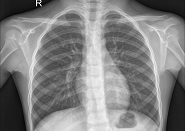
# Chest X-ray image of pneumonia patient in which fluid accumulation causes radiopaque segments
# 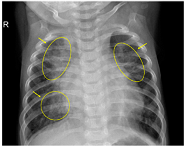

In [1]:
# Packages required:
import os
import numpy as np
import pandas as pd
from glob import glob 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from keras.metrics import BinaryAccuracy, Precision, Recall, AUC
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve, classification_report

np.random.seed(0)


!python --version 

Python 3.7.6


In [2]:
# Identify the parent folder where all folders and files are contained 
base_dir = os.path.join(os.getcwd(), '/kaggle/input/chest-xray-pneumonia/chest_xray')
total_number = len(glob(os.path.join(base_dir,'*','*','*.jpeg')))

print(os.listdir(base_dir))
# Checking the folder structure
print("Data composition in folder chest_xray\n")
for folder in ['train', 'val', 'test']:
    num_of_jpeg = len(glob(os.path.join(base_dir, folder, "*", '*.jpeg')))
    print("{}:\t\t{} ({:.2f}% of total)".format(folder, num_of_jpeg, num_of_jpeg/total_number*100))
    for subfolder in os.listdir(os.path.join(base_dir, folder)):
        num_in_subfolder = len(glob(os.path.join(base_dir, folder, subfolder,'*.jpeg')))
        print(" - {}:\t  {} ({:.2f}%)".format(subfolder, num_in_subfolder, num_in_subfolder/num_of_jpeg*100))
        
print("\n For a total of {} .jpeg files.".format(total_number))

['chest_xray', '__MACOSX', 'train', 'val', 'test']
Data composition in folder chest_xray

train:		5216 (89.07% of total)
 - NORMAL:	  1341 (25.71%)
 - PNEUMONIA:	  3875 (74.29%)
val:		16 (0.27% of total)
 - NORMAL:	  8 (50.00%)
 - PNEUMONIA:	  8 (50.00%)
test:		624 (10.66% of total)
 - NORMAL:	  234 (37.50%)
 - PNEUMONIA:	  390 (62.50%)

 For a total of 5856 .jpeg files.


# Exploratory Data Analysis
Before any attempt of creating a ML/DL model is good practice to start with an Exploratory Data Analysis (EDA) of the database. During this stage, we analyse the data set to summarise its main characteristics and gain major insight into its features using numerical analysis and visual methods.

In my experience in the healthcare and in the bioinformatics sectors, databases are usually particularly messy and noisy. Experimental and clinical data might come from many different sources (public or company databases), different laboratories following different protocols. It is imperative to be very careful with the data, check if the data provided are correct in the input phase and have multiple checks along the pipeline.
This manually curated dataset of high quality black-and-white pictures that do not require data cleaning, analysis of missing value, feature scaling, correlation analysis, etch. But I will proceed to the analysis of the data folder, and the images contained in it.

In [3]:


# First let's check that the number of files matches the description in the webpage. So to check that all images are accounted for.
total_number = len(glob(os.path.join(base_dir,'*','*','*.jpeg')))
    
# Checking the folder structure
print("Data composition in folder chest_xray\n")
for folder in ['train', 'val', 'test']:
    num_of_jpeg = len(glob(os.path.join(base_dir, folder, "*", '*.jpeg')))
    print("{}:\t\t{} ({:.2f}% of total)".format(folder, num_of_jpeg, num_of_jpeg/total_number*100))
    for subfolder in os.listdir(os.path.join(base_dir, folder)):
        num_in_subfolder = len(glob(os.path.join(base_dir, folder, subfolder,'*.jpeg')))
        print(" - {}:\t  {} ({:.2f}%)".format(subfolder, num_in_subfolder, num_in_subfolder/num_of_jpeg*100))
        
print("\n For a total of {} .jpeg files.".format(total_number))

Data composition in folder chest_xray

train:		5216 (89.07% of total)
 - NORMAL:	  1341 (25.71%)
 - PNEUMONIA:	  3875 (74.29%)
val:		16 (0.27% of total)
 - NORMAL:	  8 (50.00%)
 - PNEUMONIA:	  8 (50.00%)
test:		624 (10.66% of total)
 - NORMAL:	  234 (37.50%)
 - PNEUMONIA:	  390 (62.50%)

 For a total of 5856 .jpeg files.


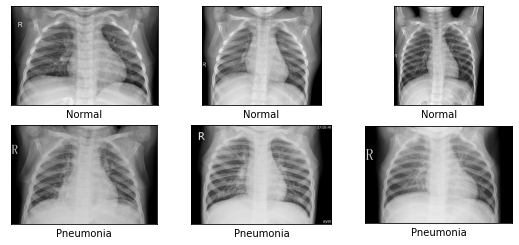

In [4]:
NORMAL = glob(os.path.join(base_dir,'*','NORMAL','*.jpeg'))
PNEUMONIA = glob(os.path.join(base_dir,'*','PNEUMONIA','*.jpeg'))

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 4))
for i in range(3):
    axes[0,i].set_xlabel('Normal')
    axes[0,i].imshow(mpimg.imread(NORMAL[i]), cmap='gray')
    axes[0,i].set_xticks([])
    axes[0,i].set_yticks([])
    axes[1,i].set_xlabel('Pneumonia')
    axes[1,i].imshow(mpimg.imread(PNEUMONIA[i]), cmap='gray')
    axes[1,i].set_xticks([])
    axes[1,i].set_yticks([])
plt.show()

In the top row of the images above, we can see three examples of NORMAL images, those representing healthy individuals with clear lungs and no opacity. While the bottom row shows three PNEUMONIA individuals with infected and more opaque lungs.

# Data preparation
First, I create a pandas dataframe that will contain the path to each of the imanges and the label associated with them.

In [5]:
# Dataframe with all images manually classified as healhy patients 
df_normal = pd.DataFrame({'Path': NORMAL, 'Class': 'NORMAL' })

# Dataframe with all images manually classified as patients wiht pneumonia
df_pneumonia = pd.DataFrame({'Path': PNEUMONIA, 'Class': 'PNEUMONIA' })

# The entire dataset of images
df = pd.concat([df_normal, df_pneumonia])

df.head()

,Path,Class
0,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
1,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
2,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
3,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL
4,/kaggle/input/chest-xray-pneumonia/chest_xray/...,NORMAL


In [6]:
df.describe()

,Path,Class
count,5856,5856
unique,5856,2
top,/kaggle/input/chest-xray-pneumonia/chest_xray/...,PNEUMONIA
freq,1,4273


# Train/test/validation split
The dataset (from kaggle) I have used in this work is divided into three folders; train, test, and validation that contain subfolders for every image type, pneumonia, and normal. The data collection includes 5,863 X-Ray images, comprising 4273 pneumonia images and 1583 images in normal cases. As there is an extremely limited quantity of information particularly in the validation set, I have consolidated all pneumonia pictures in one dataset and all ordinary pictures in another dataset. At that point, I have divided the information into 60%, 20%, and 20% for preparing validation, and testing set correspondingly.

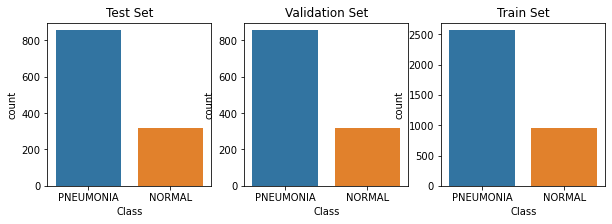

In [7]:
train_split = 0.4 # Majority of images for the train subset (60%)
X_train, X_val, y_train, y_val = train_test_split(
    df['Path'], df['Class'], 
    test_size = train_split, 
    stratify = df['Class'], # This parameter establishes a proportional split of values in the sample
    random_state=42)

val_test_split = 0.5 # Equal division for test and validation
X_test, X_val, y_test, y_val = train_test_split(
    X_val, y_val,  test_size = val_test_split, stratify = y_val, random_state=42)

train_set = pd.DataFrame({'Path': X_train, 'Class' : y_train})
val_set = pd.DataFrame({'Path': X_val, 'Class': y_val})
test_set = pd.DataFrame({'Path': X_test,'Class' : y_test})

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
sns.countplot(x="Class", data=test_set, ax=axes[0])
sns.countplot(x="Class", data=val_set, ax=axes[1])
sns.countplot(x="Class", data=train_set, ax=axes[2])

axes[0].set_title("Test Set")
axes[1].set_title("Validation Set")
axes[2].set_title("Train Set")
plt.show()

In [8]:
# Checking the folder structure after splitting
print("Data composition in rearranged sets\n")
for set_name, set_ in zip(['train_set', 'val_set', 'test_set'], [train_set, val_set, test_set]):
    print("{}:\t{} ({:.2f}% of total)".format(set_name, set_.shape[0], set_.shape[0]/total_number*100)) #
    for label in ['PNEUMONIA', 'NORMAL']:
        print(" - {}:\t  {} ({:.2f}%)".format(label, sum(set_.Class==label), set_[set_['Class']==label].shape[0]/set_.shape[0]*100))

Data composition in rearranged sets

train_set:	3513 (59.99% of total)
 - PNEUMONIA:	  2563 (72.96%)
 - NORMAL:	  950 (27.04%)
val_set:	1172 (20.01% of total)
 - PNEUMONIA:	  855 (72.95%)
 - NORMAL:	  317 (27.05%)
test_set:	1171 (20.00% of total)
 - PNEUMONIA:	  855 (73.01%)
 - NORMAL:	  316 (26.99%)


# Correct for data imbalance
In the now rearranged sets we have an equal ratio of Pneumonia/Normal images in each subsets. However, the dataset is indeed still imbalanced with a different number of Pneumonia/Normal images within each of the sets.

This can be a potential problem, indeed with our current ratio, a model could reach 73% accuracy just by classifying everything as Pneumonia. To solve this problem, I compute the class weights to indicate an imbalance in our data to our model using the parameter CLASS_WEIGHTS.

In [9]:
pneumo_in_test = sum(train_set.Class=='PNEUMONIA')
normal_in_test = sum(train_set.Class=='NORMAL')

print("Pneumonia images count in training set: {}".format(pneumo_in_test))
print("Normal images count in training set: {}\n".format(normal_in_test))
print("Total number of images: {}\n".format(train_set.shape[0]))
print("Initial bias: {:.5f}\n".format(np.log([pneumo_in_test / normal_in_test])[0]))

weight_for_normal = (1 / normal_in_test) * (train_set.shape[0]) / 2.0
weight_for_pneumo = (1 / pneumo_in_test) * (train_set.shape[0]) / 2.0

print("Weight for class 0 (Normal): {:.2f}".format(weight_for_normal))
print("Weight for class 1 (Pneuom): {:.2f}".format(weight_for_pneumo))

class_weight = {0: weight_for_normal, 1: weight_for_pneumo}

# Alternativly we could have used sklearn.utils.class_weight.compute_class_weight('balanced', np.unique(train_generator), train_generator)

Pneumonia images count in training set: 2563
Normal images count in training set: 950

Total number of images: 3513

Initial bias: 0.99247

Weight for class 0 (Normal): 1.85
Weight for class 1 (Pneuom): 0.69


# Pre processing 

In [10]:
rescale = 1./255 #  To get all the scaled data in the range [0, 1]
target_size = (128,128) # The dimensions to which all images found will be resized. In this dataset, we have images of different size
batch_size = 128 # is the number of training instances observed before the optimizer performs a weight update.
class_mode = "binary"

## Data Augmentation
# We can artificially expand our training set with multiple types of transformation, including rotation, rescaling, horizontal or vertical flip, zooming, etch.
# This also contributes to avoid overfitting issues
train_datagen = ImageDataGenerator(
    rescale = rescale,
    rotation_range = 30, # Randomly rotating pictures, it takes values between 0-180
    shear_range = 0.2, # Shear Intensity
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range = 0.2, # Randomly zooming pictures
    horizontal_flip = True # Randomly flipping half of the images horizontally
)
train_generator = train_datagen.flow_from_dataframe( #Takes the dataframe and the path to a directory plus generates batches.
        dataframe = train_set, x_col = "Path", y_col = "Class", batch_size = batch_size,seed = 42,
        shuffle = True, # Randomly shuffles the input dataset
        class_mode = class_mode,target_size = target_size)

validation_datagen = ImageDataGenerator(rescale=rescale) # Data augmentation only for train set
validation_generator = validation_datagen.flow_from_dataframe(
        dataframe = val_set, x_col = "Path", y_col = "Class", batch_size = batch_size,
        seed = 42, shuffle = False, class_mode = class_mode, target_size = target_size)

test_datagen = ImageDataGenerator(rescale=rescale)
test_generator = test_datagen.flow_from_dataframe(
    dataframe = test_set, x_col = "Path", y_col = "Class", target_size=target_size,
    class_mode=class_mode, batch_size=batch_size, shuffle = False)

Found 3513 validated image filenames belonging to 2 classes.
Found 1172 validated image filenames belonging to 2 classes.
Found 1171 validated image filenames belonging to 2 classes.


# EfficientNet: The principle part of Efficientnet is the Mobile Inverted Bottleneck Conv (MBconv) Block, in addition to squeeze-and excitation blocks.The model is created by Google AI in May 2019 which is accessible from Github repositories. To monitor the execution of the proposed strategy, I carried out the experiment using EfficientNet model.  Unlike conventional practice that arbitrary scales network width, depth, and resolution, the compound scaling method used in the model uniformly scales these factors with a set of fixed scaling coefficients. In ImageNet performance, EfficientNets significantly outperform other ConvNets while reducing parameters by up to 21x than existing ConvNets.. Also the models are small and because of using the depthwise separable convolution in MBconv block in EfficientNet, the computational complexity is minimized. This is why EfficientNet is chosen. 



In [11]:
!pip install efficientnet

     |████████████████████████████████| 50 kB 741 kB/s 


# Hyper-parameter tuning
I have used LearningRateScheduler, a callback function that is used to control this hyper-parameter over time (number of iterations/epochs). I have defined a function that takes an epoch index as input and returns the new learning rate as output. Then I have modified the learning rate based on the epoch. As the decay argument is specified in the equation, it has decreased the learning rate from the previous epoch according to the argument.

In [12]:
def get_lr_callback(batch_size=128):
    lr_start   = 0.000001
    lr_max     = 0.000005 * 2 * batch_size/16 
    lr_min     = 0.000001
    lr_1 = 8
    lr_2  = 4
    lr_decay   = 0.8
   
    def lrfn(epoch):
        if epoch < lr_1:
            lr = (lr_max - lr_start) / lr_1 * epoch + lr_start
            
        elif epoch < lr_1 + lr_2:
            lr = lr_max
            
        else:
            lr = (lr_max - lr_min) * lr_decay**(epoch - lr_1 - lr_1) + lr_min
            
        return lr

    lr_callback = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=True)
    
    return lr_callback

I have applied ModelCheckpoint and Earlystopping callback function where patience is set to 10 and validation loss is monitored.

In [13]:
import tensorflow as tf
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("xray_model.h5", save_best_only=True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
    patience=10, restore_best_weights=True, verbose=1)



# Transfer learning and Fine-tuning
I have applied transfer learning using the pre-trained EfficientNetB2 model and the weights are taken from Imagenet. 

In convolutional neural networks, the first several layers learn very specific and basic features that generalize to almost all kinds of images. As we kept going up, the features became gradually more unique to the data set upon which the model was trained. The purpose of fine-tuning is to adjust these unique features to function with the currently fed data-set of Chest X-Ray. On top of the base model, I have added a newly designed classifier and trained to adjust the weights according to new distributions and patterns.

I have calibrated the batch size, the shape of the image, learning rate, and other hyper-parameters to deliver the expected output. The fine-tuning of the top layers is also modified every time to get a better response. Adam optimizer is utilized to limit the loss function of Binary cross-entropy. Finally, I have got the best result using EfficientNet-B2 with an image size of 128×128, batch size of 128.

In [14]:
batch_size = 128
import efficientnet.keras as efn
from tensorflow.keras.callbacks import Callback
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.metrics import Recall, Precision

# Callbacks
## Keep the best model




# Model
## Define the base model with EfficientNet weights
model = efn.EfficientNetB2(weights = 'imagenet', 
                           include_top = False, 
                           input_shape = (128,128, 3))




## Output layer
x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.2)(x)



predictions = Dense(1, activation="sigmoid")(x)

## Compile and run
model = Model(inputs=model.input, outputs=predictions)

metrics_ = [ # Choosing the metrics of evaluation for our model
    AUC(name='auc'), 
    BinaryAccuracy(name='accuracy'), 
    Precision(name="precision"),
    Recall(name="recall"), 
           ]

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss='binary_crossentropy', 
              metrics=metrics_)

model_history = model.fit(train_generator,
                            validation_data=validation_generator,
                            steps_per_epoch=train_generator.n/batch_size,
                            validation_steps=validation_generator.n/batch_size,
                            epochs=35,
                            verbose=1,
                            callbacks=[checkpoint_cb, early_stopping_cb, get_lr_callback(batch_size)],
                          class_weight =class_weight)

31940608/31936256 [==============================] - 1s 0us/step

Epoch 00001: LearningRateScheduler reducing learning rate to 1e-06.
Epoch 1/35
28/27 [==============================] - 127s 5s/step - loss: 0.7388 - auc: 0.4607 - accuracy: 0.3348 - precision: 0.6744 - recall: 0.1705 - val_loss: 0.7719 - val_auc: 0.5670 - val_accuracy: 0.3259 - val_precision: 0.8571 - val_recall: 0.0912

Epoch 00002: LearningRateScheduler reducing learning rate to 1.0875000000000002e-05.
Epoch 2/35
28/27 [==============================] - 66s 2s/step - loss: 0.7094 - auc: 0.5482 - accuracy: 0.3729 - precision: 0.7571 - recall: 0.2068 - val_loss: 0.7413 - val_auc: 0.6013 - val_accuracy: 0.3686 - val_precision: 0.8249 - val_recall: 0.1708

Epoch 00003: LearningRateScheduler reducing learning rate to 2.0750000000000003e-05.
Epoch 3/35
28/27 [==============================] - 61s 2s/step - loss: 0.6674 - auc: 0.6606 - accuracy: 0.4549 - precision: 0.8529 - recall: 0.3055 - val_loss: 0.6983 - val_auc: 0.7106

In [15]:

model.evaluate(validation_generator, return_dict=True)

10/10 [==============================] - 9s 934ms/step - loss: 0.1126 - auc: 0.9897 - accuracy: 0.9616 - precision: 0.9765 - recall: 0.9708


{'loss': 0.11258235573768616,
 'auc': 0.9896655678749084,
 'accuracy': 0.961604118347168,
 'precision': 0.9764705896377563,
 'recall': 0.9707602262496948}

In [16]:
model.evaluate(test_generator, return_dict=True)

10/10 [==============================] - 14s 1s/step - loss: 0.1088 - auc: 0.9911 - accuracy: 0.9633 - precision: 0.9810 - recall: 0.9684


{'loss': 0.10875939577817917,
 'auc': 0.9910652041435242,
 'accuracy': 0.9632792472839355,
 'precision': 0.9810426831245422,
 'recall': 0.9684210419654846}

In [17]:
result  = model.evaluate(test_generator, steps=len(test_generator), 
                         verbose=False, return_dict=True)

print("The model trained has a result for:\nArea Under the Curve of {:.3f}\n\
\nAn Accuracy of {:.2f}%\nPrecison {:.2f}% and \nRecall of {:.2f}%".format(
    result['auc'],
    result['accuracy']*100,
    result['precision']*100,
    result['recall']*100
))


The model trained has a result for:
Area Under the Curve of 0.991

An Accuracy of 96.33%
Precison 98.10% and 
Recall of 96.84%


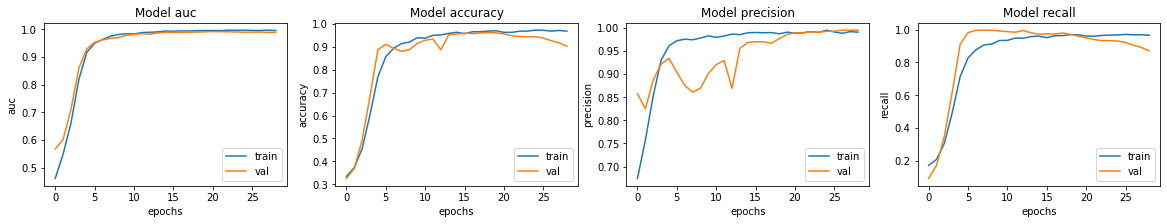

In [18]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate([ "auc",  "accuracy", "precision", "recall"]):
    ax[i].plot(model_history.history[met])
    ax[i].plot(model_history.history["val_" + met])
    ax[i].set_title("Model {}".format(met))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(met)
    ax[i].legend(["train", "val"])

In [19]:
predictions = model.predict(test_generator, batch_size = batch_size, steps=len(test_generator), verbose=0)
pred_classes =  (model.predict(test_generator, batch_size = batch_size) > 0.5).astype("int32")

print(classification_report(test_generator.labels, pred_classes))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       316
           1       0.98      0.97      0.97       855

    accuracy                           0.96      1171
   macro avg       0.95      0.96      0.95      1171
weighted avg       0.96      0.96      0.96      1171



In [20]:
preds = model.predict_generator(generator=test_generator) 
labels = 1*(preds > 0.5) 

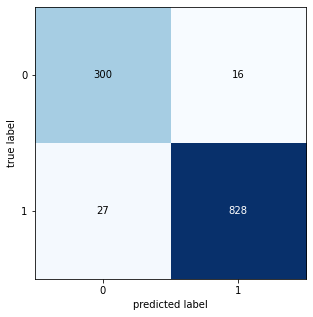

In [21]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
CM = confusion_matrix(test_generator.classes, labels)
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In the confusion metrics, I can see that among 316 test images of the normal class, 300 images are predicted as normal. Again among 855 test images of pneumonia class, 828 images are predicted as pneumonia which is quite reliable.

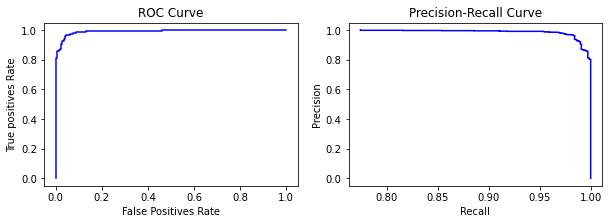

In [22]:
fpr, tpr, _ = roc_curve(test_generator.labels, predictions)
pre, rec, _ = precision_recall_curve(test_generator.labels, predictions)

fig, ax = plt.subplots(1, 2, figsize=(10, 3))

ax[0].plot(fpr, tpr, 'b')
ax[0].set_xlabel('False Positives Rate')
ax[0].set_ylabel('True positives Rate')
ax[0].set_title('ROC Curve')

ax[1].plot(pre, rec, 'b') 
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].set_title('Precision-Recall Curve')

plt.show()

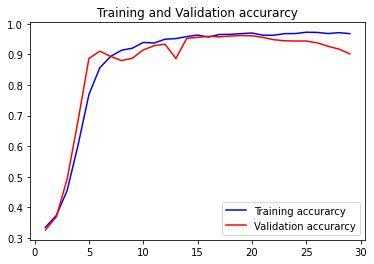

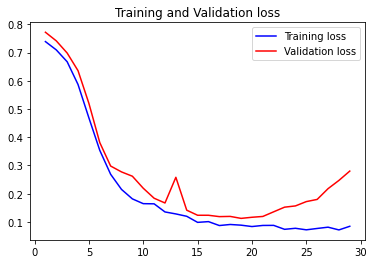

In [23]:
acc = model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [24]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 64, 64, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 64, 64, 32)   128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 64, 64, 32)   0           stem_bn[0][0]                    
_______________________________________________________________________________________

# Comparison
I have compared my work and some other latest research works dependent on a similar chest x-ray dataset which is presented below:

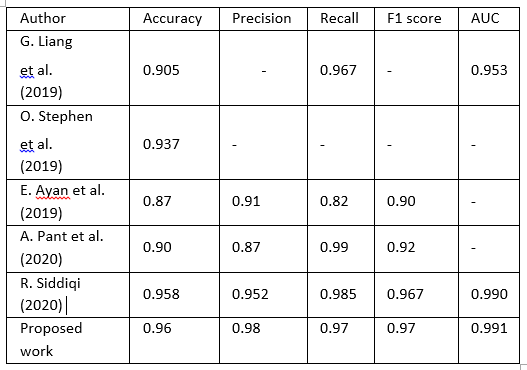


# Conclusion
In this work, I have demonstrated an interactive form of diagnosis that categorizes chest x-ray objects into pneumonia and normal. I have applied a robust and recent transfer learning model EfficientNet-B2 with fine-tuning to train the model attaining 96.33% test accuracy, 98% precision, and 97% recall. Furthermore, this work has generated an F1 score of 0.97, an AUC score of 0.991 for the ROC curve.
EfficientNet affords massive advances in parameter mitigation and loss of FLOPS(Floating Point Operations Per Second), together with tremendous accuracy gains by compound scaling scheme. It lowers the expense of computation and the use of batteries. Due to excessive transcription costs, the acquisition of broad training data is a demanding task. I have overcome this problem using transfer learning and data augmentation technique while avoiding over-fitting also. Moreover, I have diminished the issue of class imbalance. While pneumonia is detected by a single physician or doctor, this method can be considered as a mutual verification system reducing both computer and human error which is more reliable in diagnosing a patient. 